Download the dataset from ACL Wiki http://www.aueb.gr/users/ion/data/lingspam_public.tar.gz (Links to an external site.) There are many Spam datasets. Untar the dataset. Google untar and find out how you will deal with a non-zip type archives.

In [1]:
!wget -nv "http://www.aueb.gr/users/ion/data/lingspam_public.tar.gz"

2021-03-23 02:09:23 URL:http://www2.aueb.gr/users/ion/data/lingspam_public.tar.gz [11564714/11564714] -> "lingspam_public.tar.gz" [1]


In [2]:
!tar -xvf lingspam_public.tar.gz

Streaming output truncated to the last 5000 lines.
lingspam_public/lemm_stop/part2/6-1037msg3.txt
lingspam_public/lemm_stop/part2/6-1039msg1.txt
lingspam_public/lemm_stop/part2/6-1040msg1.txt
lingspam_public/lemm_stop/part2/6-1041msg1.txt
lingspam_public/lemm_stop/part2/6-1044msg1.txt
lingspam_public/lemm_stop/part2/6-1045msg1.txt
lingspam_public/lemm_stop/part2/6-1047msg1.txt
lingspam_public/lemm_stop/part2/6-1048msg1.txt
lingspam_public/lemm_stop/part2/6-1049msg1.txt
lingspam_public/lemm_stop/part2/6-1050msg1.txt
lingspam_public/lemm_stop/part2/6-1050msg2.txt
lingspam_public/lemm_stop/part2/6-1050msg3.txt
lingspam_public/lemm_stop/part2/6-1051msg1.txt
lingspam_public/lemm_stop/part2/6-1052msg1.txt
lingspam_public/lemm_stop/part2/6-1055msg1.txt
lingspam_public/lemm_stop/part2/6-1056msg1.txt
lingspam_public/lemm_stop/part2/spmsga142.txt
lingspam_public/lemm_stop/part2/spmsga143.txt
lingspam_public/lemm_stop/part2/spmsga144.txt
lingspam_public/lemm_stop/part2/spmsga145.txt
lingspam_publ

We will work with Part 1 folder in the lemm_stop folder for training purpose. For testing, we will use Part 10 in the lemm_stop folder.

In [3]:
import os
import pandas as pd
from pandas import DataFrame
import math
import operator

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Files preprocessing...

def files_preprocess(path):
    '''
    This function takes the path of the files where emails are present and store them into a Pandas dataframe 
    based on their file name. 
    We do this once for Training data and once for Testing data. 
    '''
    not_spam_files = []
    spam_files = []
    
    list_of_files = os.listdir(path)
    
    for file_name in list_of_files:
        if file_name.startswith('spm'):
            spam_files.append(file_name)
        else:
            not_spam_files.append(file_name)
    
    message = pd.Series()
    category = pd.Series()
    
    for file in not_spam_files:
        msg = pd.Series((open(path+file,'r')).read())
        cat = pd.Series('Not Spam')
        message = message.append(msg,ignore_index = True)
        category = category.append(cat,ignore_index = True)
    
    
    data1 = pd.DataFrame({'Message':message, 'Category':category})
    
    message = pd.Series()
    category = pd.Series()

    for file in spam_files:
        msg = pd.Series((open(path+file,'r')).read())
        cat = pd.Series('Spam')
        message = message.append(msg,ignore_index = True)
        category = category.append(cat,ignore_index = True)
        
    data2 = pd.DataFrame({'Message':message, 'Category':category})
    
    return data1.append(data2, ignore_index = True)

In [7]:
train_data = files_preprocess('/content/lingspam_public/lemm_stop/part1/')
train_data

,Message,Category
0,Subject: summ dialect bible translation\n\npre...,Not Spam
1,Subject: re : 5 . 1250 language acquisition / ...,Not Spam
2,Subject: lx * science * ?\n\naccept editor ' r...,Not Spam
3,"Subject: 3 . 405 language , citation\n\nprompt...",Not Spam
4,"Subject: tone grammar summary\n\n> finally , l...",Not Spam
...,...,...
284,Subject: email 57 million $ 99\n\n57 million e...,Spam
285,Subject: . . . . . hypnosis money !\n\nhi . na...,Spam
286,Subject: wante ! home product assembler !\n\nh...,Spam
287,Subject: released ! 10 million ! ! !\n\nwas re...,Spam


In [8]:
test_data = files_preprocess('/content/lingspam_public/lemm_stop/part10/')
test_data

,Message,Category
0,Subject: book historical linguistic\n\njohn be...,Not Spam
1,"Subject: euralex ' 98 - keynote lecture , tuto...",Not Spam
2,Subject: canadian assoc . immersion teacher an...,Not Spam
3,Subject: table content\n\ninstituto universita...,Not Spam
4,Subject: distribute access linguistic resource...,Not Spam
...,...,...
286,Subject: capitalfm . com\n\nhttp : / / capital...,Spam
287,"Subject: free copy "" selle product government ...",Spam
288,Subject: financial freedom while sleep\n\ndear...,Spam
289,Subject: create !\n\nvacation ! most exotic pl...,Spam


In [9]:
def clean_message(message):
    '''
    Cleans each Email message into tokens and removes stopwords and punctuations and also converts to lowercase. 
    '''
    message_tokens = word_tokenize(message.lower())
    message_tokens = [token for token in message_tokens if token.isalpha()]
    message_tokens = [word for word in message_tokens if word not in stopwords.words('english')]
    message_tokens = [word for word in message_tokens if len(word) > 3]
    
    return message_tokens

In [10]:
train_data['Message Tokens'] = (train_data['Message']).apply(clean_message)
train_data

,Message,Category,Message Tokens
0,Subject: summ dialect bible translation\n\npre...,Not Spam,"[subject, summ, dialect, bible, translation, p..."
1,Subject: re : 5 . 1250 language acquisition / ...,Not Spam,"[subject, language, acquisition, analogy, prag..."
2,Subject: lx * science * ?\n\naccept editor ' r...,Not Spam,"[subject, science, accept, editor, recent, cha..."
3,"Subject: 3 . 405 language , citation\n\nprompt...",Not Spam,"[subject, language, citation, prompt, margaret..."
4,"Subject: tone grammar summary\n\n> finally , l...",Not Spam,"[subject, tone, grammar, summary, finally, lan..."
...,...,...,...
284,Subject: email 57 million $ 99\n\n57 million e...,Spam,"[subject, email, million, million, email, addr..."
285,Subject: . . . . . hypnosis money !\n\nhi . na...,Spam,"[subject, hypnosis, money, name, denni, profes..."
286,Subject: wante ! home product assembler !\n\nh...,Spam,"[subject, wante, home, product, assembler, hom..."
287,Subject: released ! 10 million ! ! !\n\nwas re...,Spam,"[subject, released, million, released, introdu..."


In [11]:
test_data['Message Tokens'] = (test_data['Message']).apply(clean_message)
test_data

,Message,Category,Message Tokens
0,Subject: book historical linguistic\n\njohn be...,Not Spam,"[subject, book, historical, linguistic, john, ..."
1,"Subject: euralex ' 98 - keynote lecture , tuto...",Not Spam,"[subject, euralex, keynote, lecture, tutorial,..."
2,Subject: canadian assoc . immersion teacher an...,Not Spam,"[subject, canadian, assoc, immersion, teacher,..."
3,Subject: table content\n\ninstituto universita...,Not Spam,"[subject, table, content, instituto, universit..."
4,Subject: distribute access linguistic resource...,Not Spam,"[subject, distribute, access, linguistic, reso..."
...,...,...,...
286,Subject: capitalfm . com\n\nhttp : / / capital...,Spam,"[subject, capitalfm, http, capitalfm, witched,..."
287,"Subject: free copy "" selle product government ...",Spam,"[subject, free, copy, selle, product, governme..."
288,Subject: financial freedom while sleep\n\ndear...,Spam,"[subject, financial, freedom, sleep, dear, ach..."
289,Subject: create !\n\nvacation ! most exotic pl...,Spam,"[subject, create, vacation, exotic, place, ear..."


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(analyzer = clean_message)
X_train = cv.fit_transform(train_data['Message'])

In [14]:
X_train

<289x9138 sparse matrix of type '<class 'numpy.int64'>'
	with 30321 stored elements in Compressed Sparse Row format>

In [ ]:
#List of our features from Training data
vocab = cv.get_feature_names()
vocab

In [16]:
#Count of features/words
print(len(vocab))

9138


In [ ]:
#Splitting training data based on Category
train_not_spam = train_data[train_data['Category'] == 'Not Spam']
train_spam = train_data[train_data['Category'] == 'Spam']

In [ ]:
# Total Words in Spam messages
sum(list(train_spam['Message Tokens'].apply(len)))

10980

In [ ]:
# Total Words in Not Spam messages
sum(list(train_not_spam['Message Tokens'].apply(len)))

35515

You will implement a Naive Bayes classifier as outlined in Figure 4.2 in SLP3 Chapter 4. Your code should consist of the same functions as in the Figure 4.2. You should program in Python3. It is suggested to upload the python scripts or a notebook file (in COLAB). Once you train the classifier start writing your report to answer the following questions.

In [ ]:
import timeit
start_time = timeit.default_timer()

In [ ]:
def trainNB(train_data,Class,alpha):
    '''
    This function trains the data using naive bayes classifier with a laplace smoothing alpha. 
    '''
    prior_prob_c = {}
    likelihood_word_in_c = {}
    
    for c in Class:
        
        N_doc = len(train_data)
        class_data = train_data[train_data['Category'] == c]
        N_c = len(class_data)
        prior_prob_c[c] = math.log(N_c/N_doc)
        
        cv = CountVectorizer(analyzer = clean_message)
        model = cv.fit_transform(train_data['Message'])
        vocab = cv.get_feature_names()
        
        words_in_class = sum(list(class_data['Message Tokens'].apply(len)))
        
        list_likelihood = {}
        
        for word in vocab:
            count_word = count_word_in_class(word,c,class_data)   
            list_likelihood[word] = math.log((count_word + (alpha))/(words_in_class + (alpha * len(vocab))))
            
        likelihood_word_in_c[c] = list_likelihood
        
    
    return prior_prob_c,likelihood_word_in_c

In [ ]:
def count_word_in_class(word,c,data):
    '''
    This function counts the occurance of a word in a class of messages. 
    '''
    messages_tokens_list = list(data[data['Category'] == c]['Message Tokens'])
    count = 0
    
    for one_token_list in messages_tokens_list:
        if word in one_token_list:
            count += 1
    
    
    return count

In [ ]:
#Using the laplace smoothing as 1 to train the data. 
logprior_c, loglikelihood_of_word_in_c = trainNB(train_data,['Not Spam', 'Spam'],1)

In [ ]:
logprior_c

{'Not Spam': -0.18162975462177716, 'Spam': -1.7952256772045412}

In [ ]:
loglikelihood_of_word_in_c

In [ ]:
test_not_spam = test_data[test_data['Category'] == 'Not Spam']
test_spam = test_data[test_data['Category'] == 'Spam']

In [ ]:
log_prior_test = {
'Not Spam': math.log(len(test_not_spam)/len(test_data)),
'Spam': math.log(len(test_spam)/len(test_data))
}

log_prior_test

{'Not Spam': -0.18438554101480606, 'Spam': -1.781502969060866}

In [ ]:
def testNB(test_msg,log_prior,loglikelihood,Class,vocab):
  '''
  This function takes a text document and tell the classfication of it based on the log_prior and the
  likelihood of a word (in text document) to be found in either of the cateogry.
  '''
  sum_c = {}
  for c in Class:
      sum_c[c] = log_prior[c]
        
      for msg_token in test_msg:
        if msg_token in vocab:
          sum_c[c] = sum_c[c] + loglikelihood[c][msg_token]
        
  return max(sum_c.items(), key=operator.itemgetter(1))[0]

In [ ]:
#Predicting the categories of test data 
pred_Category = []
for testdoc in test_data['Message Tokens']:
  pred_Category.append(testNB(testdoc,log_prior_test,loglikelihood_of_word_in_c,['Not Spam','Spam'],vocab))


In [ ]:
test_data['Pred_Category'] = pred_Category
test_data.drop(labels = ['Message Tokens'],axis = 1)

,Message,Category,Pred_Category
0,Subject: book syntax & morphology\n\nsyntax & ...,Not Spam,Not Spam
1,Subject: encyclopedium\n\ncambridge encycloped...,Not Spam,Not Spam
2,Subject: 3rd annual interdisciplinary conferen...,Not Spam,Not Spam
3,Subject: linguistic journal - syntaxis\n\nanno...,Not Spam,Not Spam
4,Subject: meaning change - meaning variation\n\...,Not Spam,Not Spam
...,...,...,...
286,"Subject: ask join bancurus\n\nlist owner : "" b...",Spam,Spam
287,Subject: inside scoop !\n\nhttp : / / capitalf...,Spam,Spam
288,Subject: re : major acquisition !\n\ncompany :...,Spam,Spam
289,Subject: vacation !\n\nfull detail : http : / ...,Spam,Spam


In [ ]:
#Actual count of categories. 
test_data['Category'].value_counts()

Not Spam    242
Spam         49
Name: Category, dtype: int64

In [ ]:
#Predicted count of categories by the classifier. 
test_data['Pred_Category'].value_counts()

Not Spam    244
Spam         47
Name: Pred_Category, dtype: int64

In [ ]:
stop_time = timeit.default_timer()

Evaluation: What is the Precision, Recall, and F-score of the classifier that you trained? How do the class-wise metrics look? Can you report the confusion matrix between the classes? You can use functions from sklearn.metrics module to report the performance. https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
#Checking the performance for the classifer trained. 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(test_data['Category'],test_data['Pred_Category']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99       242
        Spam       0.98      0.94      0.96        49

    accuracy                           0.99       291
   macro avg       0.98      0.97      0.98       291
weighted avg       0.99      0.99      0.99       291



In [ ]:
print(accuracy_score(test_data['Category'],test_data['Pred_Category']))

0.9862542955326461


In [ ]:
print(confusion_matrix(test_data['Category'],test_data['Pred_Category']))

[[241   1]
 [  3  46]]


What kind of data structures did you use? Hint: Use defaultdict from collections module. What is the time taken to run your program? Specify the platform used.

In [ ]:
#Time taken to run the classifier. 
stop_time - start_time

124.288472114

I have used Pandas Dataframe to store the email messages and their corresponding categories.

The time taken to run is 45 seconds

I have used Google Colab

The algorithm in Figure 4.2 uses add-1 smoothing. Can you modify your function to handle add-LaTeX: \alpha α smoothing. LaTeX: \alpha α is a number between 0 and 1. Once your function handles this smoothing parameter, can you assess the impact of this parameter on the performance of the classifier?

In [ ]:
# Now we run for different values of alpha, laplace smoothing, starting from 0.1 to 1 increasing evert 0.1 step. 

laplace_addition = 0.1
accuracy_scores = []
while laplace_addition <= 1:
    log_prior_test, likelihood_prob_of_word_in_c = trainNB(train_data,['Not Spam', 'Spam'],laplace_addition)
    
    pred_Category = []
    for testdoc in test_data['Message Tokens']:
        pred_Category.append(testNB(testdoc,log_prior_test,likelihood_prob_of_word_in_c,['Not Spam','Spam'],vocab))
    
    test_data['Pred_Category'] = pred_Category
    accuracy_scores.append(accuracy_score(test_data['Category'],test_data['Pred_Category']))
    
    laplace_addition += 0.1

print(accuracy_scores)

[0.9862542955326461, 0.9862542955326461, 0.9896907216494846, 0.9896907216494846, 0.9862542955326461, 0.9862542955326461, 0.9862542955326461, 0.9862542955326461, 0.9862542955326461, 0.9862542955326461]


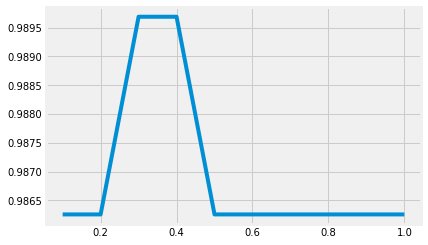

In [ ]:
#plotting a graph for alpha values v/s accuracy scores

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import numpy as np

plt.plot(np.arange(0.1,1.1,0.1),(accuracy_scores))

Classifier comparison with sklearn's implementation. Can you compare your classifier's performance with that of sklearn's implementation here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB (Links to an external site.) Use CountVectorizer in sklearn for this purpose. An example of a sklearn based text classifier is here: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#training-a-classifier (Links to an external site.) You are free to google around and be inspired. Write up your observations.

In [ ]:
#mapping the categories to Binary to fit the sklearn's inbuilt Naive bayes method

bi_classify = {
    'Not Spam': 0,
    'Spam':1
}

In [ ]:
#Train data
train_data['Category_Bi'] = train_data['Category'].map(bi_classify)
train_data.drop(labels = ['Message Tokens'],axis = 1)

,Message,Category,Category_Bi
0,"Subject: re : 3 . 386 chomsky , mac concordanc...",Not Spam,0
1,Subject: chomsky citation\n\nalthough faithful...,Not Spam,0
2,"Subject: query : stieber 's law\n\n, repeat qu...",Not Spam,0
3,Subject: acquisition reflexive verb\n\nenquiry...,Not Spam,0
4,Subject: re : 3 . 396 chomsky citation\n\nseco...,Not Spam,0
...,...,...,...
284,Subject: email 57 million $ 99\n\n57 million e...,Spam,1
285,Subject: \n\nauthenticate sender subject : ( +...,Spam,1
286,Subject: < f * r * e * e > b * e * s * t teen ...,Spam,1
287,Subject: \n\nb r g n r f r e s 1 - stop travel...,Spam,1


In [ ]:
#Test data
test_data['Category_Bi'] = test_data['Category'].map(bi_classify)
test_data.drop(labels = ['Message Tokens'],axis = 1)

,Message,Category,Pred_Category,Category_Bi
0,Subject: semantic\n\ndynamics focus structure ...,Not Spam,Not Spam,0
1,Subject: theory predicate\n\ntheory predicates...,Not Spam,Not Spam,0
2,Subject: linguistic journal - syntaxis\n\nanno...,Not Spam,Not Spam,0
3,Subject: 14th comparative germanic syntax work...,Not Spam,Not Spam,0
4,Subject: lasso\n\ncall paper lasso xxvii 27th ...,Not Spam,Not Spam,0
...,...,...,...,...
286,Subject: search . . . credibility ! ! !\n\ndre...,Spam,Spam,1
287,"Subject: free copy "" selle product government ...",Spam,Spam,1
288,Subject: stock market information\n\nsender : ...,Spam,Spam,1
289,"Subject: read ! !\n\ndream ? member our team ,...",Spam,Spam,1


In [ ]:
#Using the sklearn Naive bayes to compare the classifier's performance
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Training the data
classifier = MultinomialNB().fit(X_train,train_data['Category_Bi'])

In [ ]:
#Predicting the train data with the classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)


#Checking the performance
print(classification_report(train_data['Category_Bi'],pred))
print('Accuracy Score is ' + str(accuracy_score(train_data['Category_Bi'],pred)))
print('Confusion Matrix is \n' + str(confusion_matrix(train_data['Category_Bi'],pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00        48

    accuracy                           1.00       289
   macro avg       1.00      1.00      1.00       289
weighted avg       1.00      1.00      1.00       289

Accuracy Score is 1.0
Confusion Matrix is 
[[241   0]
 [  0  48]]


In [ ]:
 #Transforming the test data
 X_test = cv.transform(test_data['Message'])

In [ ]:
#Predicting the test data based on the above classifier. 
pred = classifier.predict(X_test)

#Checking its performance. 
print(classification_report(test_data['Category_Bi'],pred))
print('Accuracy Score is ' + str(accuracy_score(test_data['Category_Bi'],pred)))
print(confusion_matrix(test_data['Category_Bi'],pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       242
           1       0.98      0.94      0.96        49

    accuracy                           0.99       291
   macro avg       0.98      0.97      0.98       291
weighted avg       0.99      0.99      0.99       291

Accuracy Score is 0.9862542955326461
[[241   1]
 [  3  46]]


In [ ]:
#Actual Categories count in test data
test_data['Category_Bi'].value_counts()

0    242
1     49
Name: Category_Bi, dtype: int64

In [ ]:
#Predicted
np.unique(pred, return_counts=True)

(array([0, 1]), array([244,  47]))